# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2381 Ваньков Ярослав Сергеевич и Вакуленко Инна Юрьевна. Бригада №4.


## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.


## Основные теоретические положения

### Единичный цифровой импульс

Единичный цифровой импульс определяется:

$$\delta_d(k) = \begin{cases} 1, & k = 0 \\ 0, & k \neq 0 \end{cases}$$

### Дискретный единичный скачок

$$\sigma_d(k) = \begin{cases} 1, & k \geq 0 \\ 0, & k < 0 \end{cases}$$

Связь: $\sigma_d(k) = \sum_{i=0}^{k} \delta_d(i)$

### Дискретная экспоненциальная функция

$$s_1(k) = a^k \cdot \sigma_d(k)$$

При $|a| < 1$ экспонента убывает. Связь с непрерывной: $a = e^{\alpha T}$

### Комплексный гармонический сигнал

$$s_2(k) = C \cdot e^{j\hat{\omega}_0 k} = C \cdot \cos(\hat{\omega}_0 k) + j \cdot C \cdot \sin(\hat{\omega}_0 k)$$

### Задержка сигнала

Задержка на $m$ отсчётов: $x(k - m)$

### Дискретное время

Связь: $t = nT$, где $n$ - номер отсчёта, $T$ - период дискретизации.

Частота дискретизации: $f_s = \frac{1}{T}$


## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей в соответствии с индивидуальным вариантом.

### Параметры варианта (бригада №4)

На основе номера бригады $N_b = 4$ вычисляются:

| Параметр | Формула | Значение |
|----------|---------|----------|
| $N_b$ | Номер бригады | 4 |
| $N$ | $30 + (N_b \mod 5)$ | 34 |
| $T$ | $0.0005 \cdot (1 + (N_b \mod 3))$ | 0.001 с |
| $a$ | $(-1)^{N_b} \cdot (0.8 + 0.005 \cdot (N_b \mod 20))$ | 0.82 |
| $C$ | $1 + (N_b \mod 5)$ | 5 |
| $\hat{\omega}_0$ | $\pi/(6 + (N_b \mod 5))$ | π/10 ≈ 0.3142 рад |
| $m$ | $5 + (N_b \mod 5)$ | 9 |


## Выполнение работы


In [1]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

# Настройка отображения
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12, 5)


In [2]:
# Параметры варианта для бригады 4
Nb = 4
N = 30 + (Nb % 5)  # 34
T = 0.0005 * (1 + (Nb % 3))  # 0.001
a = ((-1) ** Nb) * (0.8 + 0.005 * (Nb % 20))  # 0.82
C = 1 + (Nb % 5)  # 5
w0 = np.pi / (6 + (Nb % 5))  # π/10
m = 5 + (Nb % 5)  # 9

# Дискретное время
n = np.arange(0, N)
t = n * T

print(f"Параметры: N={N}, T={T}, a={a:.2f}, C={C}, ω₀={w0:.4f}, m={m}")
print(f"Частота дискретизации: fs = {1/T} Гц")


Параметры: N=34, T=0.001, a=0.82, C=5, ω₀=0.3142, m=9
Частота дискретизации: fs = 1000.0 Гц


### 1. Единичный цифровой импульс δd(k)


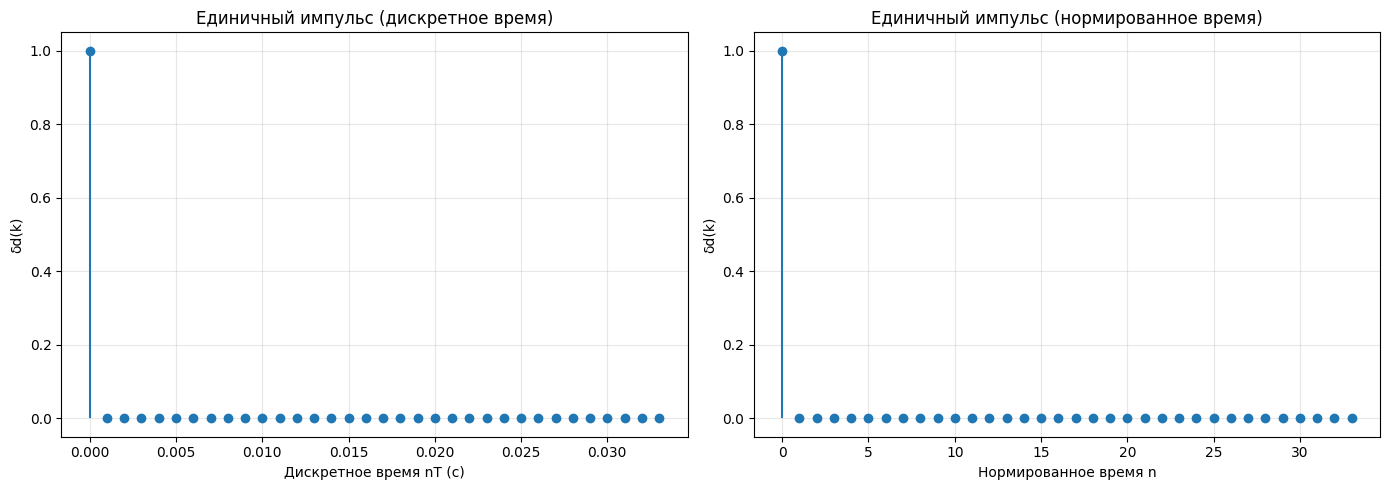

In [3]:
# Единичный импульс
delta_d = np.zeros(N)
delta_d[0] = 1

# График
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.stem(t, delta_d, basefmt=' ')
ax1.set_xlabel('Дискретное время nT (с)')
ax1.set_ylabel('δd(k)')
ax1.set_title('Единичный импульс (дискретное время)')
ax1.grid(True, alpha=0.3)

ax2.stem(n, delta_d, basefmt=' ')
ax2.set_xlabel('Нормированное время n')
ax2.set_ylabel('δd(k)')
ax2.set_title('Единичный импульс (нормированное время)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 2. Дискретный единичный скачок σd(k)


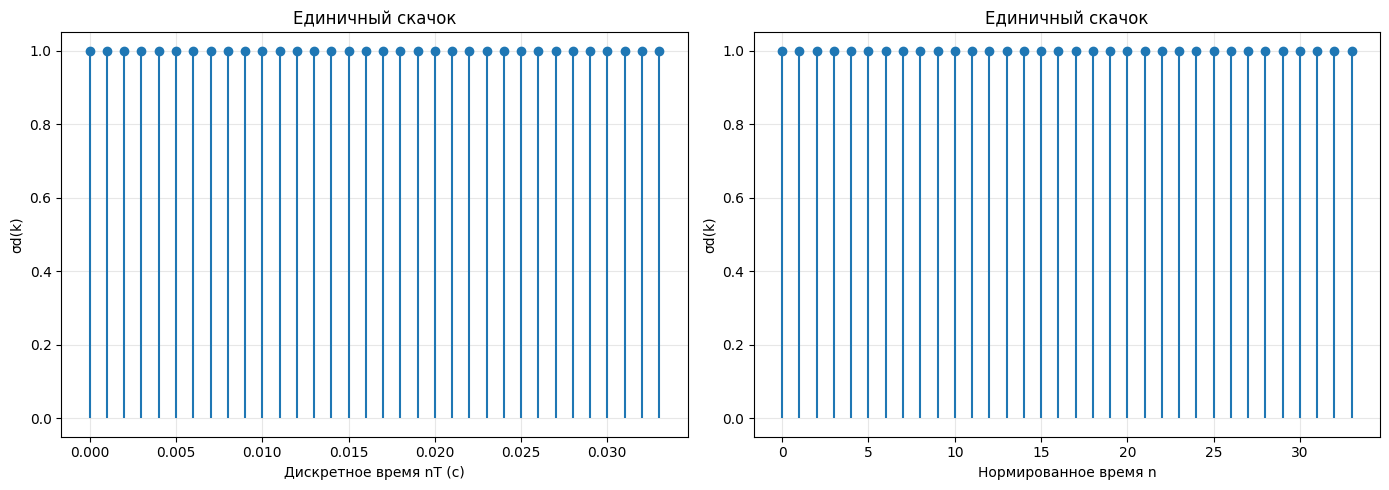

In [4]:
# Единичный скачок
sigma_d = np.ones(N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.stem(t, sigma_d, basefmt=' ')
ax1.set_xlabel('Дискретное время nT (с)')
ax1.set_ylabel('σd(k)')
ax1.set_title('Единичный скачок')
ax1.grid(True, alpha=0.3)

ax2.stem(n, sigma_d, basefmt=' ')
ax2.set_xlabel('Нормированное время n')
ax2.set_ylabel('σd(k)')
ax2.set_title('Единичный скачок')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 3. Дискретная экспонента s₁(k) = aᵏ


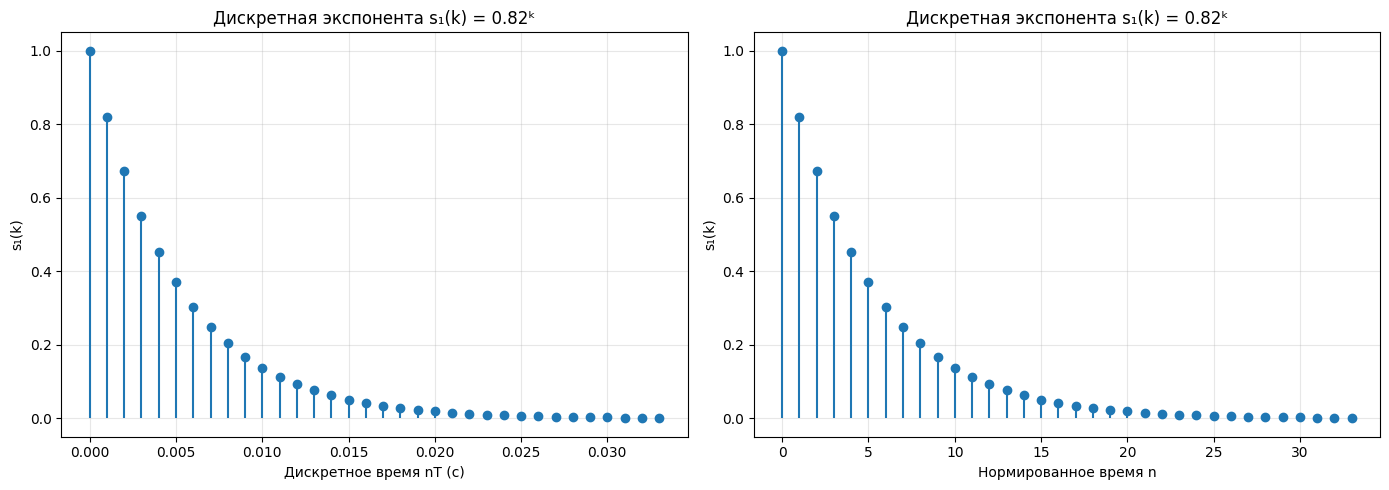

In [5]:
# Экспоненциальная функция
s1 = a ** n

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.stem(t, s1, basefmt=' ')
ax1.set_xlabel('Дискретное время nT (с)')
ax1.set_ylabel('s₁(k)')
ax1.set_title(f'Дискретная экспонента s₁(k) = {a:.2f}ᵏ')
ax1.grid(True, alpha=0.3)

ax2.stem(n, s1, basefmt=' ')
ax2.set_xlabel('Нормированное время n')
ax2.set_ylabel('s₁(k)')
ax2.set_title(f'Дискретная экспонента s₁(k) = {a:.2f}ᵏ')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 4. Комплексный гармонический сигнал s₂(k)


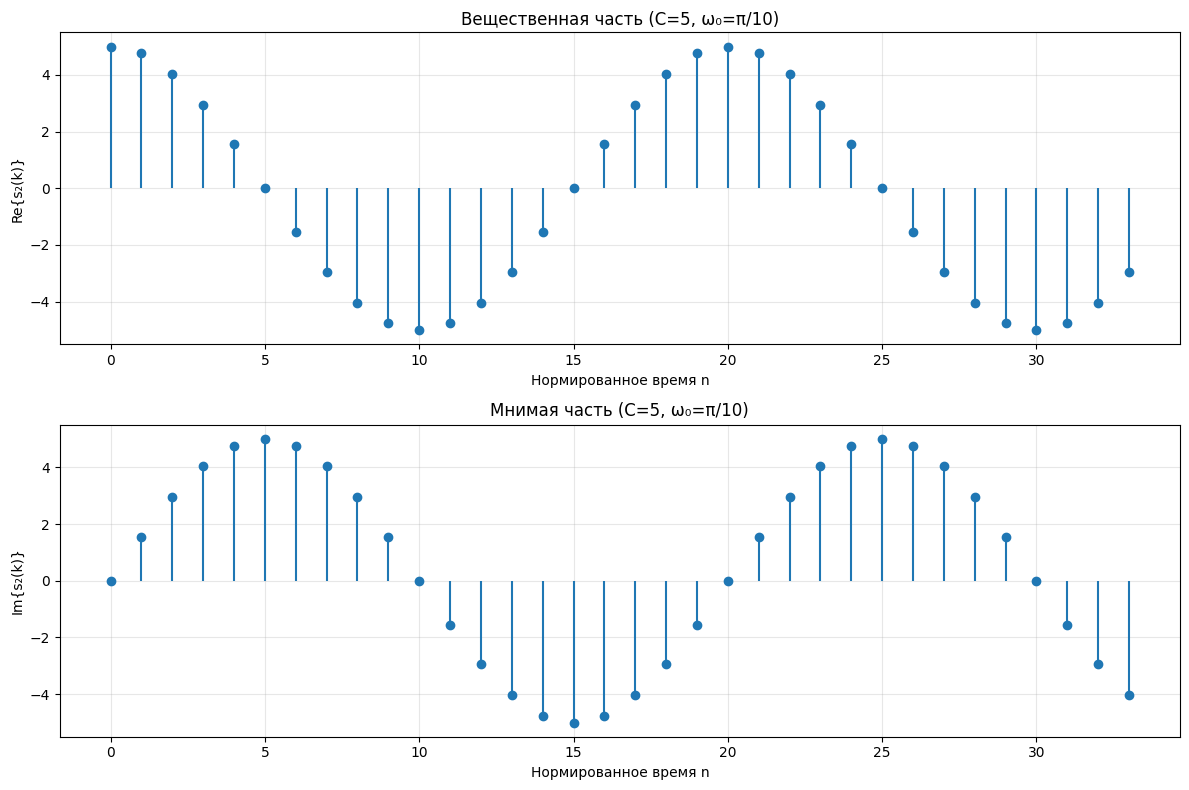

По формуле Эйлера:
s₂(k) = 5·cos(0.3142k) + j·5·sin(0.3142k)


In [6]:
# Комплексный гармонический сигнал
s2 = C * np.exp(1j * w0 * n)
s2_real = np.real(s2)
s2_imag = np.imag(s2)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Вещественная часть
ax1.stem(n, s2_real, basefmt=' ')
ax1.set_xlabel('Нормированное время n')
ax1.set_ylabel('Re{s₂(k)}')
ax1.set_title(f'Вещественная часть (C={C}, ω₀=π/10)')
ax1.grid(True, alpha=0.3)

# Мнимая часть
ax2.stem(n, s2_imag, basefmt=' ')
ax2.set_xlabel('Нормированное время n')
ax2.set_ylabel('Im{s₂(k)}')
ax2.set_title(f'Мнимая часть (C={C}, ω₀=π/10)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("По формуле Эйлера:")
print(f"s₂(k) = {C}·cos({w0:.4f}k) + j·{C}·sin({w0:.4f}k)")


### 5. Задержанные последовательности на m = 9 отсчётов


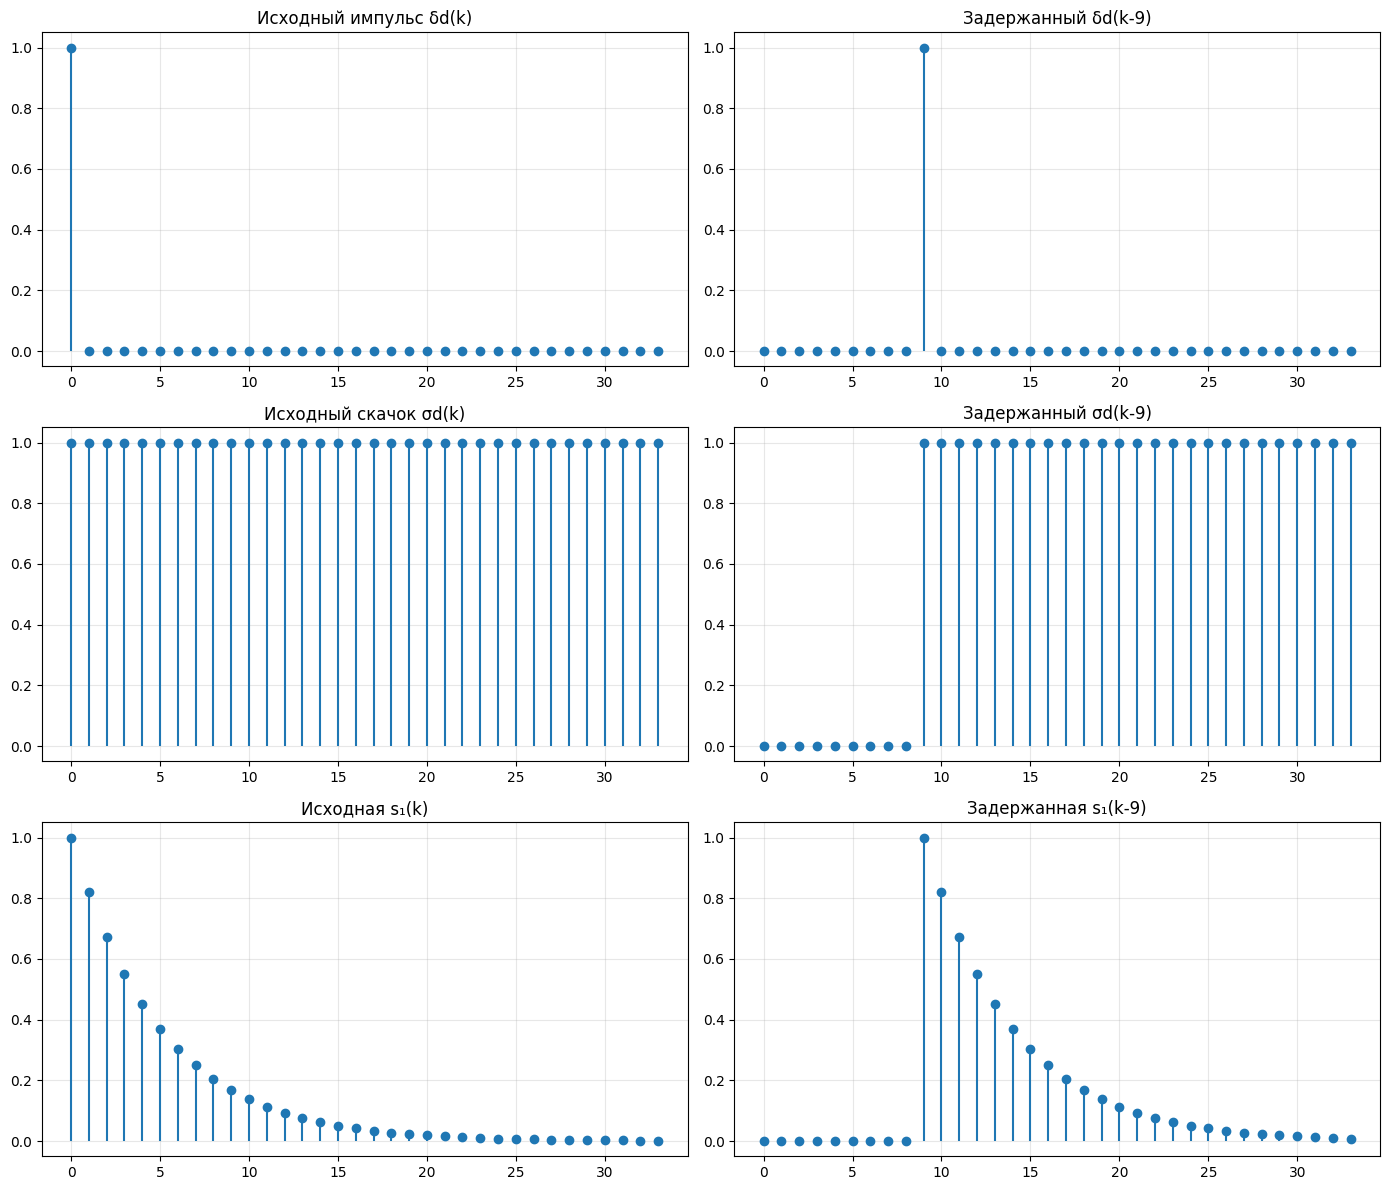

In [7]:
# Задержанные последовательности
delta_d_delayed = np.zeros(N)
if m < N:
    delta_d_delayed[m] = 1

sigma_d_delayed = np.zeros(N)
sigma_d_delayed[m:] = 1

s1_delayed = np.zeros(N)
for k in range(m, N):
    s1_delayed[k] = a ** (k - m)

# График
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Импульсы
axes[0, 0].stem(n, delta_d, basefmt=' ')
axes[0, 0].set_title('Исходный импульс δd(k)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].stem(n, delta_d_delayed, basefmt=' ')
axes[0, 1].set_title(f'Задержанный δd(k-{m})')
axes[0, 1].grid(True, alpha=0.3)

# Скачки
axes[1, 0].stem(n, sigma_d, basefmt=' ')
axes[1, 0].set_title('Исходный скачок σd(k)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].stem(n, sigma_d_delayed, basefmt=' ')
axes[1, 1].set_title(f'Задержанный σd(k-{m})')
axes[1, 1].grid(True, alpha=0.3)

# Экспоненты
axes[2, 0].stem(n, s1, basefmt=' ')
axes[2, 0].set_title('Исходная s₁(k)')
axes[2, 0].grid(True, alpha=0.3)

axes[2, 1].stem(n, s1_delayed, basefmt=' ')
axes[2, 1].set_title(f'Задержанная s₁(k-{m})')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Выводы

В ходе выполнения лабораторной работы были изучены основные стандартные дискретные сигналы и освоены программные средства их моделирования.

**Получены следующие результаты:**

1. **Единичный цифровой импульс** $\delta_d(k)$ смоделирован на обоих интервалах времени. Установлено, что в отличие от дельта-функции Дирака, он имеет конечную амплитуду 1 при $k=0$.

2. **Дискретный единичный скачок** $\sigma_d(k)$ является дискретным аналогом функции Хевисайда. Частота дискретизации составляет $f_s = 1000$ Гц.

3. **Дискретная экспонента** $s_1(k) = 0.82^k$ убывает, так как $|a| = 0.82 < 1$. Это соответствует затухающей непрерывной экспоненте с показателем $\alpha = \ln(0.82)/T \approx -198.4$ с⁻¹.

4. **Комплексный гармонический сигнал** $s_2(k) = 5 \cdot e^{j\pi k/10}$ разложен на вещественную $5\cos(\pi k/10)$ и мнимую $5\sin(\pi k/10)$ части, сдвинутые по фазе на $\pi/2$.

5. **Задержанные последовательности** на $m = 9$ отсчётов демонстрируют временной сдвиг всех сигналов вправо на 9 позиций.

6. Освоены практические навыки моделирования дискретных сигналов с использованием Python и NumPy/Matplotlib.

**Цель работы достигнута:** изучено математическое описание стандартных дискретных сигналов и получены навыки их программного моделирования.
